# Plot global overturning

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.gridspec as gridspec
%matplotlib inline

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/42545/status,
Dashboard: /proxy/42545/status,Workers: 7
Total threads: 28,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45425,Workers: 7
Dashboard: /proxy/42545/status,Total threads: 28
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:44161,Total threads: 4
Dashboard: /proxy/37613/status,Memory: 18.29 GiB
Nanny: tcp://127.0.0.1:36279,


In [3]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [4]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

If you get a 'read-only database' warning, it is because the database has not finished building. 

In [6]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

### Load overturning data

Calculated in `Calc_overturning.ipynb`

In [7]:
psi_CM2_025 = xr.open_dataarray(path_to_data + 'psi_global_0_499.nc')

In [8]:
psi_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/psi_global_CM2_1_400_499.nc')
psi_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/psi_global_OM2_025_2300_2399.nc')
psi_OM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/psi_global_OM2_1_2500_2599.nc')

Time average

In [14]:
psi_CM2_025_mean = psi_CM2_025[399:498].mean('time')
psi_CM2_1_mean   = psi_CM2_1.mean('time')
psi_OM2_025_mean = psi_OM2_025.mean('time')
psi_OM2_1_mean   = psi_OM2_1.mean('time')

AMO +ve and -ve composites

In [50]:
year_pos_amo = [  2,   6,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  97,  98,  99, 100, 103, 104, 105, 112, 113,
       191, 193, 194, 197, 199, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218,
       219, 220, 227, 231, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327, 334, 339,
       340, 341, 383, 384, 393, 394, 496, 497, 498, 499]

year_neg_amo = [ 32,  33,  35, 137, 139, 141, 142, 145, 146, 147, 153,
       155, 156, 158, 159, 160, 161, 162, 163, 165, 167, 168,
       169, 170, 171, 173, 174, 175, 176, 177, 179, 180, 181,
       182, 257, 258, 260, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 347, 350, 351, 352, 353, 354, 355, 356, 357,
       358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       410, 460, 466, 470, 471, 472, 474, 475, 476, 477]

year_pos_amo_minus1 = [ii-1 for ii in year_pos_amo]
year_neg_amo_minus1 = [ii-1 for ii in year_neg_amo]

In [53]:
psi_CM2_025_amo_pos = psi_CM2_025[year_pos_amo_minus1,...].mean('time')
psi_CM2_025_amo_neg = psi_CM2_025[year_neg_amo_minus1,...].mean('time')

### Plot overturning

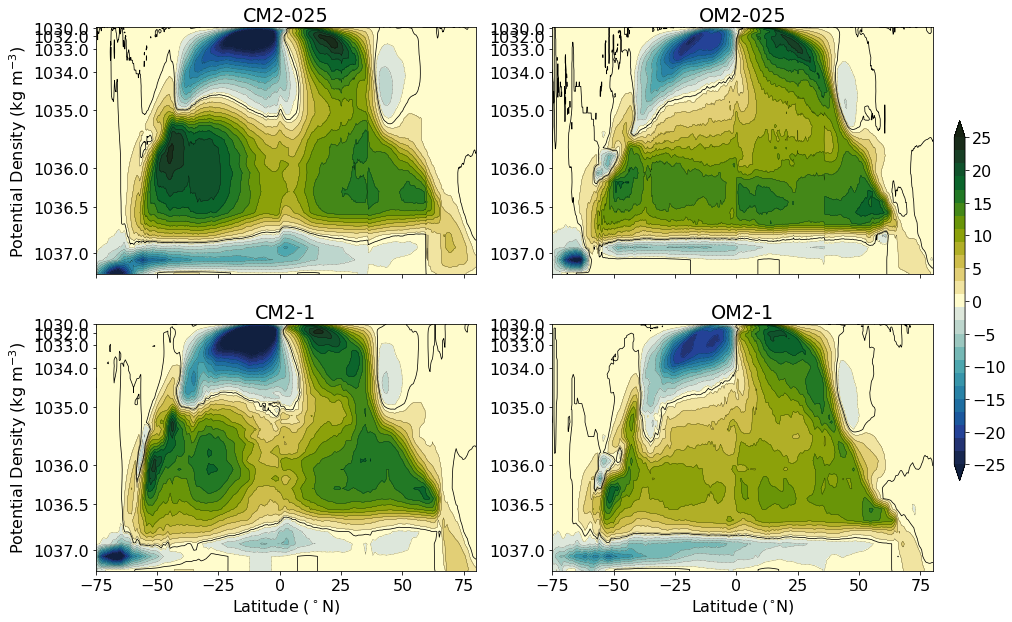

In [57]:
clev=np.arange(-25,27,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac  = 4  ## A power to set the stretching of the y-axis

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax0 = ax[0,0]
ax1 = ax[0,1]
ax2 = ax[1,0]
ax3 = ax[1,1]

# CM2-025
p1 = ax0.contourf(psi_CM2_025_mean.grid_yu_ocean,(psi_CM2_025_mean.potrho-1028)**scfac, psi_CM2_025_mean, cmap=cm.cm.delta, levels=clev, extend='both')
ax0.contour(psi_CM2_025_mean.grid_yu_ocean,(psi_CM2_025_mean.potrho-1028)**scfac, psi_CM2_025_mean, levels=clev, colors='k', linewidths=0.25)
ax0.contour(psi_CM2_025_mean.grid_yu_ocean,(psi_CM2_025_mean.potrho-1028)**scfac, psi_CM2_025_mean, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025')
ax0.tick_params(labelbottom=False)

# OM2-025
p1 = ax1.contourf(psi_OM2_025_mean.grid_yu_ocean,(psi_OM2_025_mean.potrho-1028)**scfac, psi_OM2_025_mean, cmap=cm.cm.delta, levels=clev, extend='both')
ax1.contour(psi_OM2_025_mean.grid_yu_ocean,(psi_OM2_025_mean.potrho-1028)**scfac, psi_OM2_025_mean, levels=clev, colors='k', linewidths=0.25)
ax1.contour(psi_OM2_025_mean.grid_yu_ocean,(psi_OM2_025_mean.potrho-1028)**scfac, psi_OM2_025_mean, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('OM2-025')
ax1.tick_params(labelbottom=False)

# CM2-1
p1 = ax2.contourf(psi_CM2_1_mean.grid_yu_ocean,(psi_CM2_1_mean.potrho-1028)**scfac, psi_CM2_1_mean, cmap=cm.cm.delta, levels=clev, extend='both')
ax2.contour(psi_CM2_1_mean.grid_yu_ocean,(psi_CM2_1_mean.potrho-1028)**scfac, psi_CM2_1_mean, levels=clev, colors='k', linewidths=0.25)
ax2.contour(psi_CM2_1_mean.grid_yu_ocean,(psi_CM2_1_mean.potrho-1028)**scfac, psi_CM2_1_mean, levels=[0.0,], colors='k', linewidths=0.75)
ax2.set_yticks((yticks-1028)**scfac)
ax2.set_yticklabels(yticks)
ax2.set_ylim([0.5**scfac, 9.2**scfac])
ax2.invert_yaxis()
ax2.set_xlabel('Latitude ($^\circ$N)')
ax2.set_xlim([-75,80])
ax2.set_title('CM2-1')
ax2.set_ylabel('Potential Density (kg m$^{-3}$)')

# OM2-1
p1 = ax3.contourf(psi_OM2_1_mean.grid_yu_ocean,(psi_OM2_1_mean.potrho-1028)**scfac, psi_OM2_1_mean, cmap=cm.cm.delta, levels=clev, extend='both')
ax3.contour(psi_OM2_1_mean.grid_yu_ocean,(psi_OM2_1_mean.potrho-1028)**scfac, psi_OM2_1_mean, levels=clev, colors='k', linewidths=0.25)
ax3.contour(psi_OM2_1_mean.grid_yu_ocean,(psi_OM2_1_mean.potrho-1028)**scfac, psi_OM2_1_mean, levels=[0.0,], colors='k', linewidths=0.75)
ax3.set_yticks((yticks-1028)**scfac)
ax3.set_yticklabels(yticks)
ax3.set_ylim([0.5**scfac, 9.2**scfac])
ax3.invert_yaxis()
ax3.set_xlabel('Latitude ($^{\circ}$N)')
ax3.set_xlim([-75,80])
ax3.set_title('OM2-1')

# Plot colorbar
cax  = plt.axes([0.92, 0.25, 0.01, 0.5])
cbar = plt.colorbar(p1, cax=cax, orientation='vertical', ticks=np.arange(-25, 30, 5))
cbar.ax.set_xlabel('Sv')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_overturning_psi.png'
    plt.savefig(fig_path + fig_name, dpi=300);

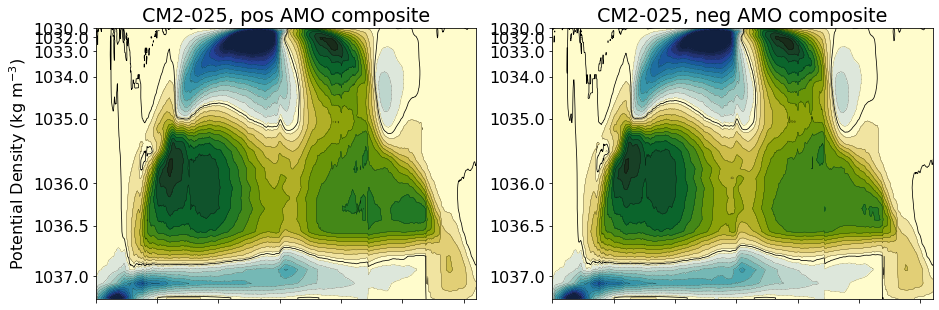

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax0 = ax[0]
ax1 = ax[1]


# CM2-025 pos amo composite
p1 = ax0.contourf(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, cmap=cm.cm.delta, levels=clev, extend='both')
ax0.contour(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, levels=clev, colors='k', linewidths=0.25)
ax0.contour(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025, pos AMO composite')
ax0.tick_params(labelbottom=False)

# CM2-025 neg amo composite
p1 = ax1.contourf(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, cmap=cm.cm.delta, levels=clev, extend='both')
ax1.contour(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, levels=clev, colors='k', linewidths=0.25)
ax1.contour(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('CM2-025, neg AMO composite')
ax1.tick_params(labelbottom=False)


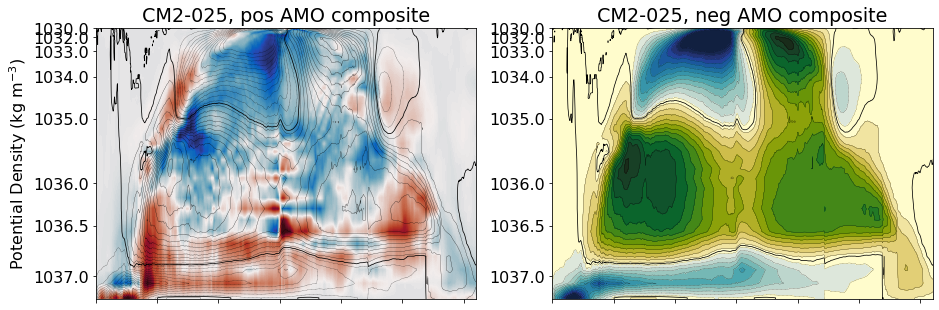

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax0 = ax[0]
ax1 = ax[1]


# CM2-025 pos amo composite
p1 = ax0.contourf(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos-psi_CM2_025_mean, cmap=cm.cm.balance, levels=np.arange(-1,1.1,0.01), extend='both')
ax0.contour(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, levels=clev, colors='k', linewidths=0.25)
ax0.contour(psi_CM2_025_amo_pos.grid_yu_ocean,(psi_CM2_025_amo_pos.potrho-1028)**scfac, psi_CM2_025_amo_pos, levels=[0.0,], colors='k', linewidths=0.75)
ax0.set_yticks((yticks-1028)**scfac)
ax0.set_yticklabels(yticks)
ax0.set_ylim([0.5**scfac, 9.2**scfac])
ax0.invert_yaxis()
ax0.set_ylabel('Potential Density (kg m$^{-3}$)')
ax0.set_xlim([-75,80])
ax0.set_title('CM2-025, pos AMO composite')
ax0.tick_params(labelbottom=False)

# CM2-025 neg amo composite
p1 = ax1.contourf(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, cmap=cm.cm.delta, levels=clev, extend='both')
ax1.contour(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, levels=clev, colors='k', linewidths=0.25)
ax1.contour(psi_CM2_025_amo_neg.grid_yu_ocean,(psi_CM2_025_amo_neg.potrho-1028)**scfac, psi_CM2_025_amo_neg, levels=[0.0,], colors='k', linewidths=0.75)
ax1.set_yticks((yticks-1028)**scfac)
ax1.set_yticklabels(yticks)
ax1.set_ylim([0.5**scfac, 9.2**scfac])
ax1.invert_yaxis()
ax1.set_xlim([-75,80])
ax1.set_title('CM2-025, neg AMO composite')
ax1.tick_params(labelbottom=False)


### Time series of max values

In [71]:
max_NH = psi_CM2_025.sel(grid_yu_ocean=slice(10,90)).max('potrho').max('grid_yu_ocean')

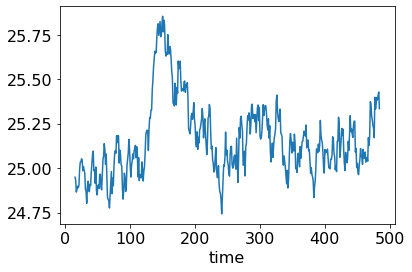

In [74]:
max_NH.rolling(time=30, center=True).mean('time').plot()

In [77]:
min_SH = psi_CM2_025.sel(grid_yu_ocean=slice(-90,-60)).min('potrho').min('grid_yu_ocean')

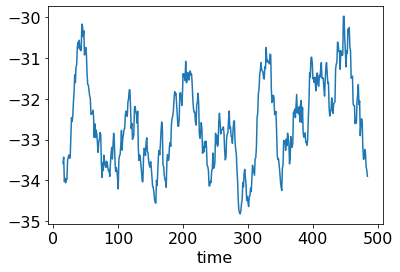

In [78]:
min_SH.rolling(time=30, center=True).mean('time').plot()